In [1]:
import numpy as np
from data_load import FeedingData
from data_load import DriveDataSet, DataGenerator, AngleTypeWithZeroRecordAllocator, AngleSegmentRecordAllocator, \
    AngleSegment, drive_record_filter_exclude_duplicated_small_angles, drive_record_filter_include_all, \
    drive_record_filter_exclude_zeros, RecordRandomAllocator
from data_generators import image_itself, brightness_image_generator, shadow_generator, \
     shift_image_generator, random_generators, pipe_line_generators, pipe_line_random_generators, flip_generator
from visualization import Video, Plot
from performance_timer import Timer
from IPython.display import Image
from IPython.display import YouTubeVideo
from IPython.display import HTML
import base64

%matplotlib inline

IMG_TAG = """<img src="data:image/gif;base64,{0}" alt="some_text">"""

def display_gif(file_name):
    data="0"
    data = open(file_name, "rb").read()
    data = base64.b64encode(data)
    tag = IMG_TAG.format(data.decode())
    return HTML(tag)

def create_real_dataset(filter_method):
    return DriveDataSet.from_csv(
        "datasets/udacity-sample-track-1/driving_log.csv",
        filter_method=filter_method,
        fake_image=True
    )

def _angle_distribution(
            name, batches, batch_size, allocator,
            angle_offset_pre_pixel=0.002, generator=None
    ):

        if generator is None:
            generator = pipe_line_random_generators(
                image_itself,
                shift_image_generator(angle_offset_pre_pixel=angle_offset_pre_pixel),
                flip_generator
            )
        data_generator = DataGenerator(allocator, generator)
        angles = np.array([])
        for index in range(batches):
            print("batch {} / {}".format(index, batches))
            _, _angles = next(data_generator.generate(batch_size=batch_size))
            angles = np.append(angles, _angles)

        plt = Plot.angle_distribution(angles)
        return plt
    

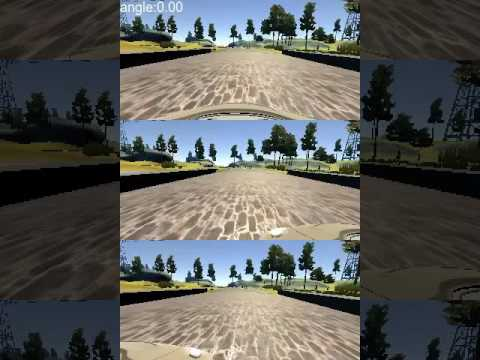

In [13]:
YouTubeVideo("LLCXS-uCMSw",width=320,height=360)

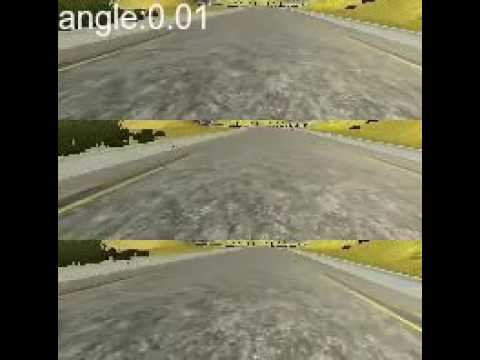

In [14]:
YouTubeVideo("pxG46j9kK0I",width=320,height=200)


[MoviePy] Building file test/resources/generator_pipe_line.gif with imageio


 95%|█████████▌| 20/21 [00:00<00:00, 79.92it/s]



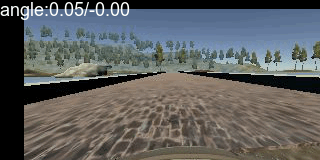

In [3]:
def test_gif_for_generator():
    dataset = DriveDataSet.from_csv("datasets/udacity-sample-track-1/driving_log.csv")

    generator = pipe_line_generators(
        image_itself,
        shift_image_generator(angle_offset_pre_pixel=0.002),
        flip_generator,
        brightness_image_generator(0.25),
        shadow_generator
    )
    Video.from_generators("test/resources/generator_pipe_line.gif", dataset[60], 20, generator)

test_gif_for_generator()
display_gif("test/resources/generator_pipe_line.gif")


[MoviePy] Building file test/resources/generator_pipe_line_crop.gif with imageio


 95%|█████████▌| 20/21 [00:00<00:00, 113.39it/s]



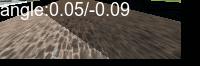

In [4]:
def test_gif_for_generator_crop():
    dataset = DriveDataSet.from_csv("datasets/udacity-sample-track-1/driving_log.csv", crop_images=True)

    generator = pipe_line_generators(
        image_itself,
        shift_image_generator(angle_offset_pre_pixel=0.002),
        flip_generator,
        brightness_image_generator(0.25),
        shadow_generator
    )
    Video.from_generators("test/resources/generator_pipe_line_crop.gif", dataset[60], 20, generator)

test_gif_for_generator_crop()
display_gif("test/resources/generator_pipe_line_crop.gif")

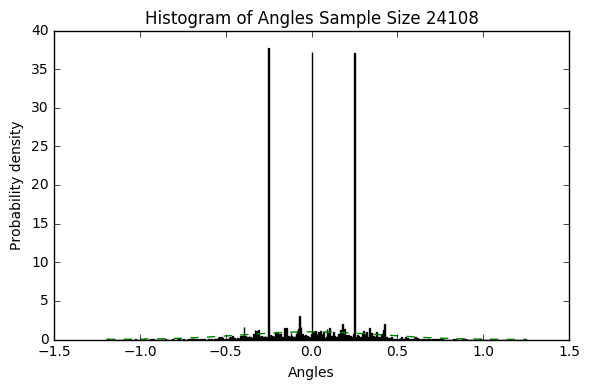

In [4]:

def test_angle_distribution():
    dataset = create_real_dataset(filter_method=drive_record_filter_include_all)
    plt = Plot.angle_distribution(dataset.angles())
    plt.show()

test_angle_distribution()

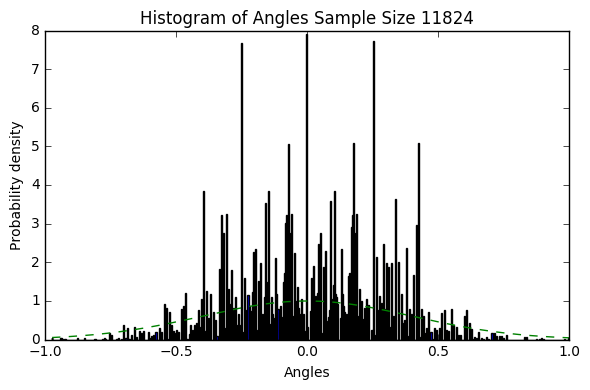

In [27]:
def test_angle_distribution_after_filterout_small_angles():
    dataset = create_real_dataset(filter_method=drive_record_filter_exclude_small_angles)
    plt = Plot.angle_distribution(dataset.angles())
    plt.show()
    
test_angle_distribution_after_filterout_small_angles()

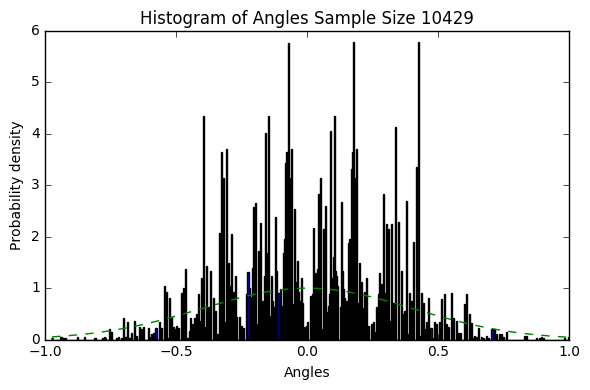

In [28]:
def test_angle_distribution_after_filterout_zeros():
    dataset = create_real_dataset(filter_method=drive_record_filter_exclude_zeros)
    plt = Plot.angle_distribution(dataset.angles())
    plt.show()

test_angle_distribution_after_filterout_zeros()

batch 0 / 100
batch 1 / 100
batch 2 / 100
batch 3 / 100
batch 4 / 100
batch 5 / 100
batch 6 / 100
batch 7 / 100
batch 8 / 100
batch 9 / 100
batch 10 / 100
batch 11 / 100
batch 12 / 100
batch 13 / 100
batch 14 / 100
batch 15 / 100
batch 16 / 100
batch 17 / 100
batch 18 / 100
batch 19 / 100
batch 20 / 100
batch 21 / 100
batch 22 / 100
batch 23 / 100
batch 24 / 100
batch 25 / 100
batch 26 / 100
batch 27 / 100
batch 28 / 100
batch 29 / 100
batch 30 / 100
batch 31 / 100
batch 32 / 100
batch 33 / 100
batch 34 / 100
batch 35 / 100
batch 36 / 100
batch 37 / 100
batch 38 / 100
batch 39 / 100
batch 40 / 100
batch 41 / 100
batch 42 / 100
batch 43 / 100
batch 44 / 100
batch 45 / 100
batch 46 / 100
batch 47 / 100
batch 48 / 100
batch 49 / 100
batch 50 / 100
batch 51 / 100
batch 52 / 100
batch 53 / 100
batch 54 / 100
batch 55 / 100
batch 56 / 100
batch 57 / 100
batch 58 / 100
batch 59 / 100
batch 60 / 100
batch 61 / 100
batch 62 / 100
batch 63 / 100
batch 64 / 100
batch 65 / 100
batch 66 / 100
batch

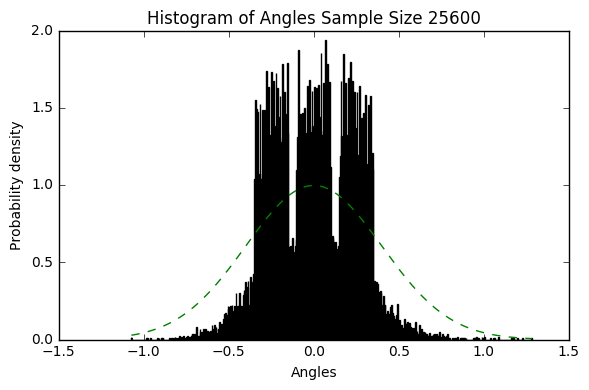

In [11]:
def test_angle_distribution_generator_random_allocator():
    data_set = create_real_dataset(filter_method=drive_record_filter_include_all)
    allocator = RecordRandomAllocator(data_set)
    generator = pipe_line_generators(
        shift_image_generator(angle_offset_pre_pixel=0.002),
        flip_generator
    )
    _angle_distribution(
        "angle_distribution_generator_exclude_duplicated_small_angles_40_20_40_pipe_line", 100, 256,
        allocator=allocator.allocate,
        angle_offset_pre_pixel=0.002,
        generator=generator
    )
    
test_angle_distribution_generator_random_allocator()

batch 0 / 100
batch 1 / 100
batch 2 / 100
batch 3 / 100
batch 4 / 100
batch 5 / 100
batch 6 / 100
batch 7 / 100
batch 8 / 100
batch 9 / 100
batch 10 / 100
batch 11 / 100
batch 12 / 100
batch 13 / 100
batch 14 / 100
batch 15 / 100
batch 16 / 100
batch 17 / 100
batch 18 / 100
batch 19 / 100
batch 20 / 100
batch 21 / 100
batch 22 / 100
batch 23 / 100
batch 24 / 100
batch 25 / 100
batch 26 / 100
batch 27 / 100
batch 28 / 100
batch 29 / 100
batch 30 / 100
batch 31 / 100
batch 32 / 100
batch 33 / 100
batch 34 / 100
batch 35 / 100
batch 36 / 100
batch 37 / 100
batch 38 / 100
batch 39 / 100
batch 40 / 100
batch 41 / 100
batch 42 / 100
batch 43 / 100
batch 44 / 100
batch 45 / 100
batch 46 / 100
batch 47 / 100
batch 48 / 100
batch 49 / 100
batch 50 / 100
batch 51 / 100
batch 52 / 100
batch 53 / 100
batch 54 / 100
batch 55 / 100
batch 56 / 100
batch 57 / 100
batch 58 / 100
batch 59 / 100
batch 60 / 100
batch 61 / 100
batch 62 / 100
batch 63 / 100
batch 64 / 100
batch 65 / 100
batch 66 / 100
batch

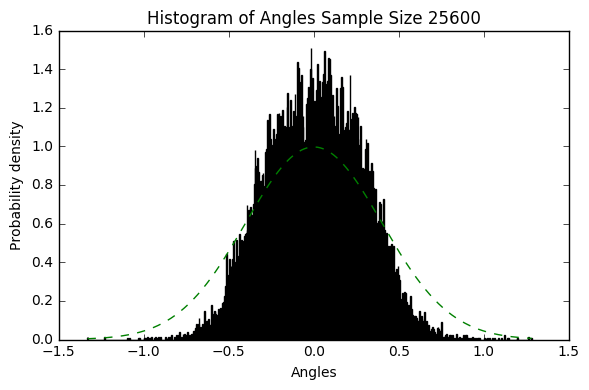

In [8]:
# the training sample size dropped from 24100 to 11824, half of the valuable data has gone
# what if some how we can use that data?
def test_angle_distribution_generator_45_10_45_pipe_line():
    data_set = create_real_dataset(filter_method=drive_record_filter_include_all)
    allocator = AngleTypeWithZeroRecordAllocator(data_set, 35, 35, 6, 3, 3, 0.25)
    generator = pipe_line_generators(
        shift_image_generator(angle_offset_pre_pixel=0.002),
        flip_generator,
        brightness_image_generator(0.25)
    )
    _angle_distribution(
        "angle_distribution_generator_exclude_duplicated_small_angles_40_20_40_pipe_line", 100, 256,
        allocator=allocator.allocate,
        angle_offset_pre_pixel=0.002,
        generator=generator
    )
    
test_angle_distribution_generator_45_10_45_pipe_line()

batch 0 / 100
batch 1 / 100
batch 2 / 100
batch 3 / 100
batch 4 / 100
batch 5 / 100
batch 6 / 100
batch 7 / 100
batch 8 / 100
batch 9 / 100
batch 10 / 100
batch 11 / 100
batch 12 / 100
batch 13 / 100
batch 14 / 100
batch 15 / 100
batch 16 / 100
batch 17 / 100
batch 18 / 100
batch 19 / 100
batch 20 / 100
batch 21 / 100
batch 22 / 100
batch 23 / 100
batch 24 / 100
batch 25 / 100
batch 26 / 100
batch 27 / 100
batch 28 / 100
batch 29 / 100
batch 30 / 100
batch 31 / 100
batch 32 / 100
batch 33 / 100
batch 34 / 100
batch 35 / 100
batch 36 / 100
batch 37 / 100
batch 38 / 100
batch 39 / 100
batch 40 / 100
batch 41 / 100
batch 42 / 100
batch 43 / 100
batch 44 / 100
batch 45 / 100
batch 46 / 100
batch 47 / 100
batch 48 / 100
batch 49 / 100
batch 50 / 100
batch 51 / 100
batch 52 / 100
batch 53 / 100
batch 54 / 100
batch 55 / 100
batch 56 / 100
batch 57 / 100
batch 58 / 100
batch 59 / 100
batch 60 / 100
batch 61 / 100
batch 62 / 100
batch 63 / 100
batch 64 / 100
batch 65 / 100
batch 66 / 100
batch

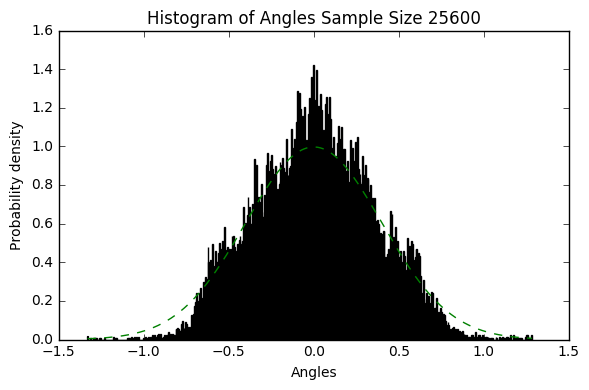

In [5]:
# the training sample size dropped from 24100 to 11824, half of the valuable data has gone
# what if some how we can use that data?
def test_angle_distribution_generator_sharp_zero_slow_zero_allocator_pipe_line():
    data_set = create_real_dataset(filter_method=drive_record_filter_include_all)
    allocator = AngleSegmentRecordAllocator(
        data_set,
        AngleSegment((-1.5, -0.5), 10),    # big sharp left
        AngleSegment((-0.5, -0.25), 14),   # sharp left
        AngleSegment((-0.25, -0.249), 3),  # sharp turn left (zero right camera)
        AngleSegment((-0.249, -0.1), 10),  # big turn left
        AngleSegment((-0.1, 0), 11),       # straight left
        AngleSegment((0, 0.001), 4),      # straight zero center camera
        AngleSegment((0.001, 0.1), 11),    # straight right
        AngleSegment((0.1, 0.25), 10),     # big turn right
        AngleSegment((0.25, 0.251), 3),   # sharp turn right (zero left camera)
        AngleSegment((0.251, 0.5), 14),   # sharp right
        AngleSegment((0.5, 1.5), 10)     # big sharp right
    )
    generator = pipe_line_generators(
        shift_image_generator(angle_offset_pre_pixel=0.002),
        flip_generator,
        brightness_image_generator(0.25)
    )
    _angle_distribution(
        "angle_distribution_generator_exclude_duplicated_small_angles_40_20_40_pipe_line", 100, 256,
        allocator=allocator.allocate,
        angle_offset_pre_pixel=0.002,
        generator=generator
    )
    
test_angle_distribution_generator_sharp_zero_slow_zero_allocator_pipe_line()